In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [226]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [227]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping 'customer ID' as it is unique to all customers and does not contribute anything to the final churn

In [229]:
df.drop(['customerID'],axis=1,inplace=True)

Checking if there are any null values in the dataset

In [230]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking if there are any NAN values in the dataset

In [231]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [232]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [233]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [234]:
# dropping all tenure rows with 0 values
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Int64Index([], dtype='int64')

In [235]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label encoding the Churn column (0 = No, 1 = Yes)

In [236]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['Churn'] = LE.fit_transform(list(df['Churn']))

Checking out how many churned and not churned

Churned percentage is 26.58
Not churned percentage is 73.42


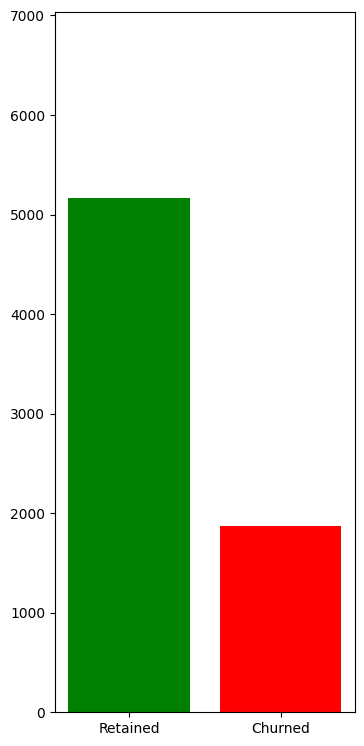

In [237]:
churned = round((df['Churn'].value_counts()[1]/df.shape[0])*100,2)
notchurned = round((df['Churn'].value_counts()[0]/df.shape[0])*100,2)
print(f"Churned percentage is {churned}")
print(f"Not churned percentage is {notchurned}")
plotter = {'Retained':df['Churn'].value_counts()[0],'Churned':df['Churn'].value_counts()[1]}
fig = plt.figure(figsize=(3,7))
axis = fig.add_axes([0,0,1,1])
axis.bar(list(plotter.keys()), list(plotter.values()),color=['green','red']);
axis.set_ylim(0,df.shape[0])
plt.show()
# Adding a semi colon in the end of plot statement will suppress unwanted output from the plot

Splitting all the categorical and continuous variables

In [238]:
categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
continuous = ['tenure','MonthlyCharges','TotalCharges']

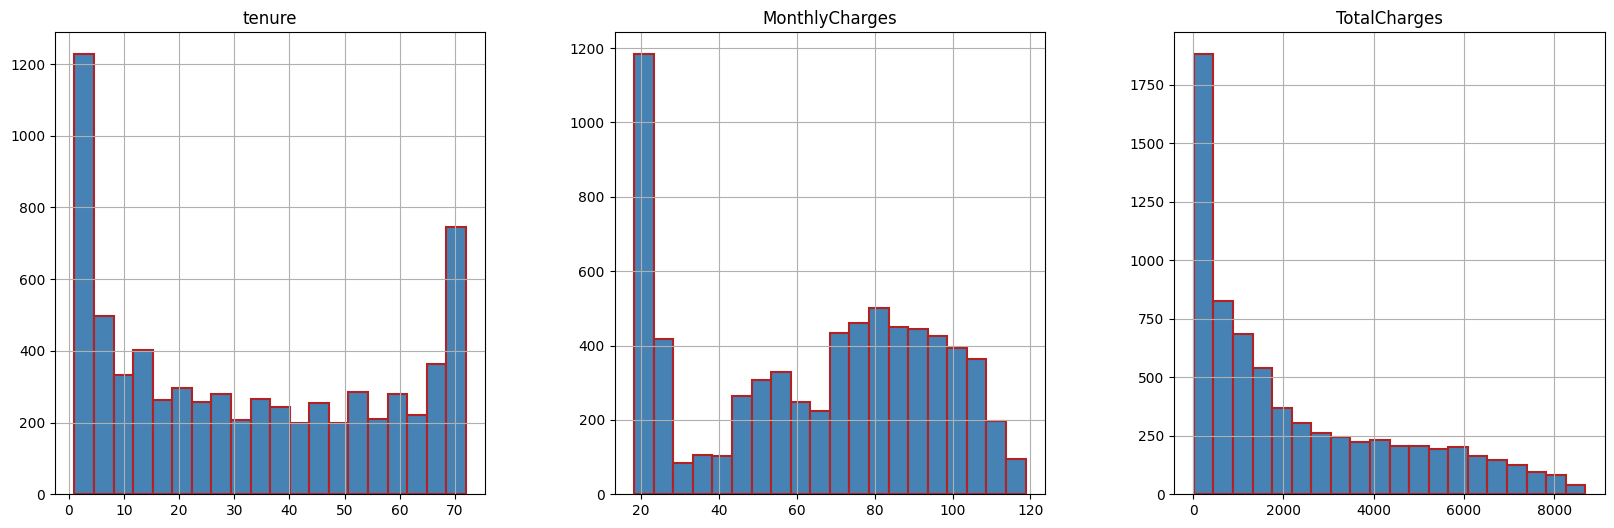

In [239]:
df[continuous].hist(figsize=(20, 6),
                          bins=20,
                          layout=(1, 3),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

Plotting categorical values in histgrams

In [240]:
def plot_categorical(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Churn',
                  data=df,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Churn',
                data=df,
                ax=ax2)
    ax2.set_ylabel('Churn rate')


    plt.tight_layout()

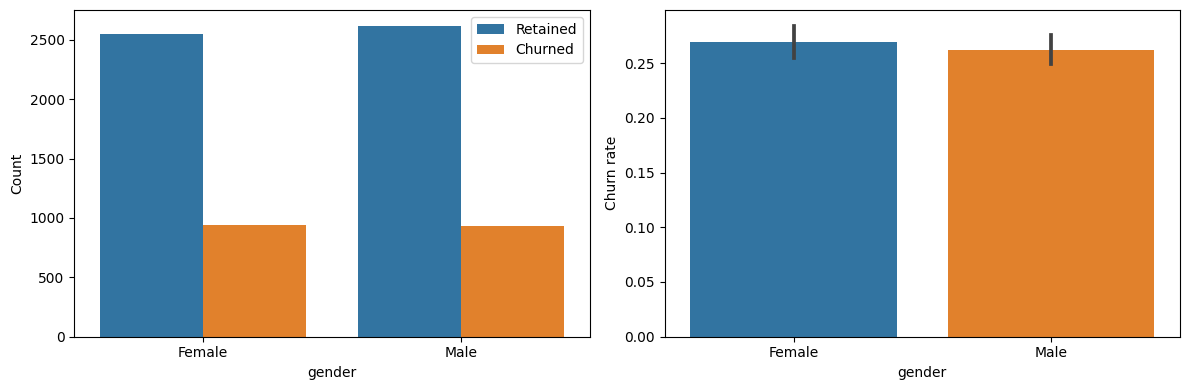

In [241]:
plot_categorical('gender')

Analysis of Gender variable

The data set has almost equal number of Male and Female customers, and both genders are equally likely to Churn or Retain.
The gender variable does not contribute much in determining / predicting if a customer will churn or not.

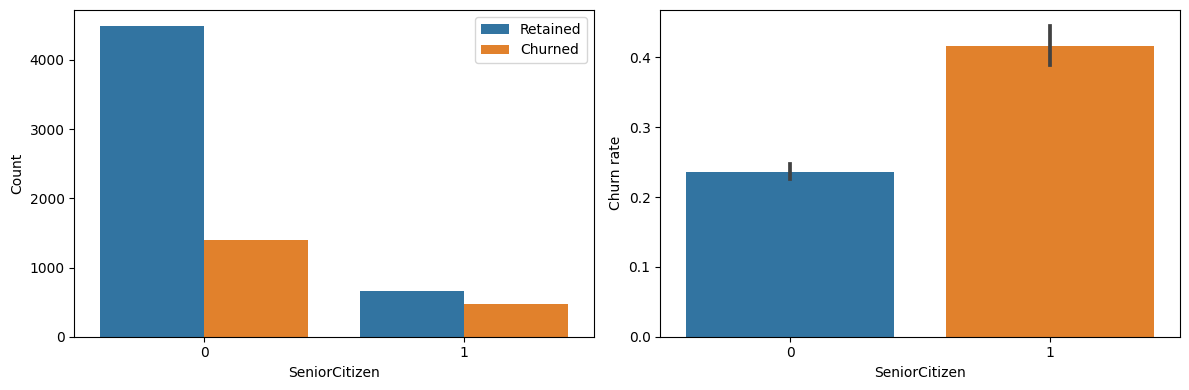

In [242]:
plot_categorical('SeniorCitizen')

Analysis of Senior Citizens variable

The majority of customers are not Senior Citizens. The majority of Senior Citizens are likely to retain, while a slightly less number will considern to Churn.

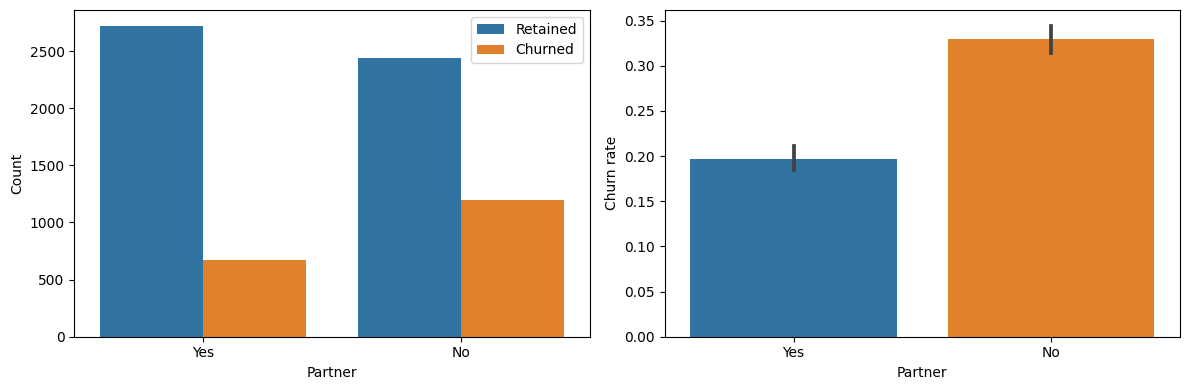

In [243]:
plot_categorical('Partner')

Analysis of Partner

There is a almost equal number of customers who have and do not have partners. There is not significant distinction of churn rate between customers who have partners and those who do not.

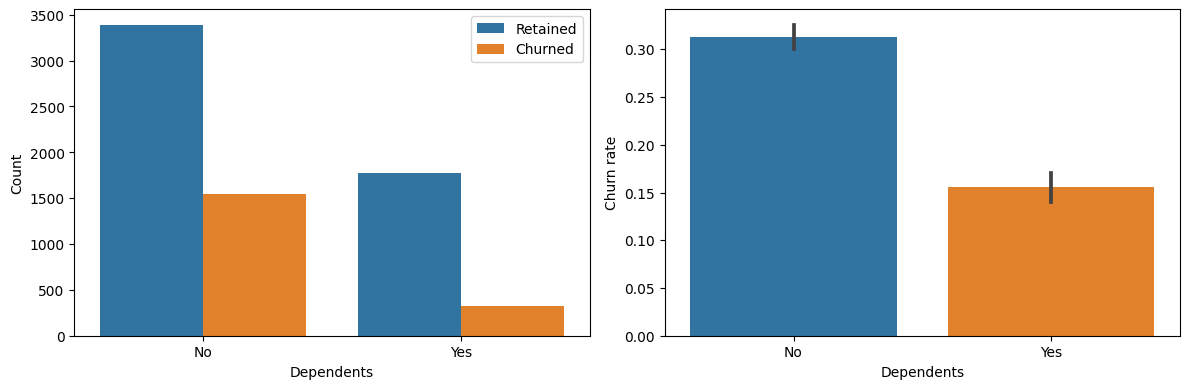

In [244]:
plot_categorical('Dependents')

Analysis of Dependents

The majority of customers do NOT have any dependents. Majority of people regardless if they have dependents are more likely to Retain then churn.

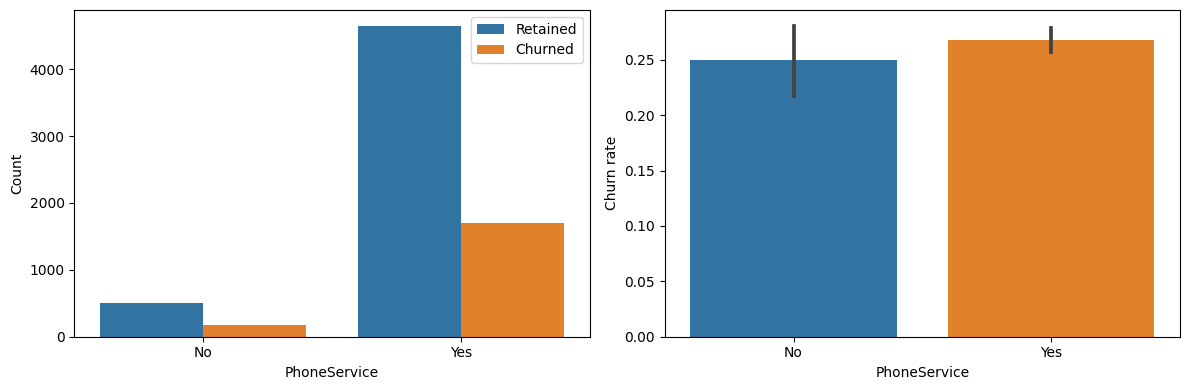

In [245]:
plot_categorical('PhoneService')

Analysis of Phone Service

The majority of customers have a phone service. Those who do not are slightly more likely to Retain then churn. The customers who have phone service are most likely going to Retain then Churn.

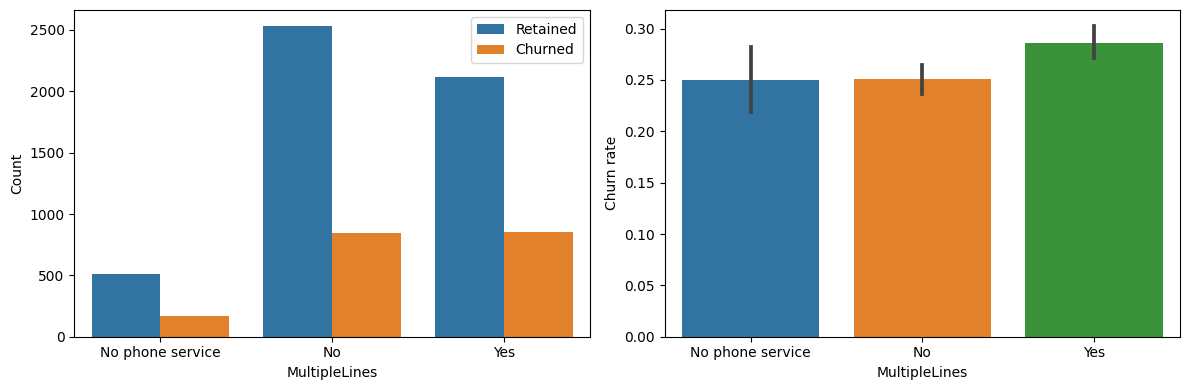

In [246]:
plot_categorical('MultipleLines')

Analysis of Multiple Lines

The number of customers who have multiple lines is marginarlly lesser than number of customers who have no multiple lines (by almost 300). The customers with a single line are in the minority.

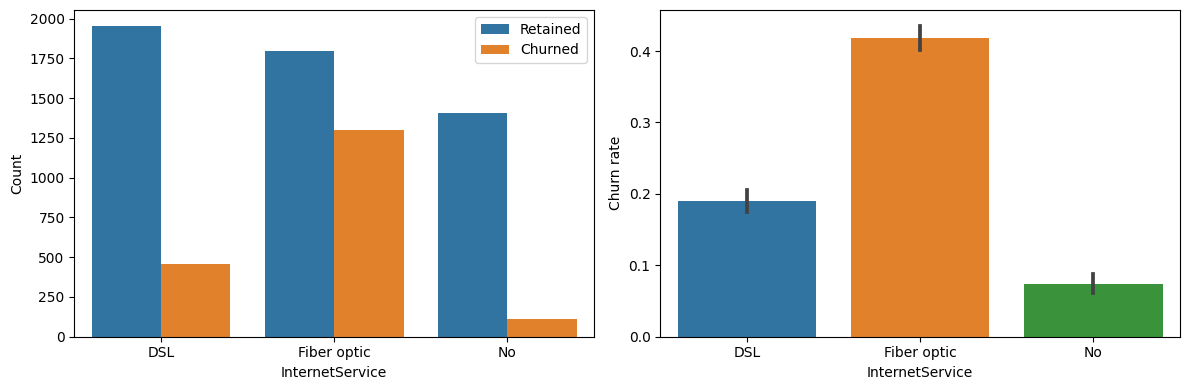

In [247]:
plot_categorical('InternetService')

Analysis of Internet Service

Customers having fiber optic or DSL service is considerably higher than those who have no internet service.

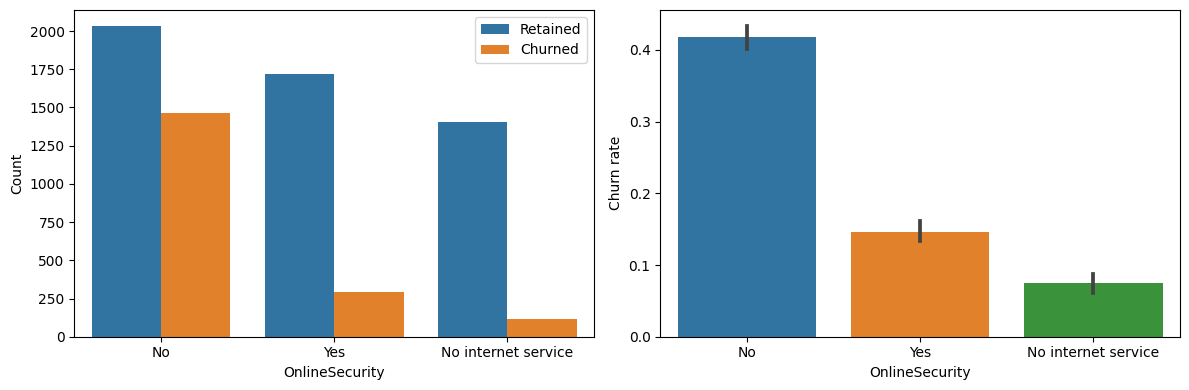

In [248]:
plot_categorical('OnlineSecurity')

Analysis of Online Security

The number of customers who DO NOT have some sort of online security is almost 1500 more than those who have online security.
More people with online security are most likely to Retain than Churn.

<AxesSubplot: title={'center': 'OnlineBackup'}, xlabel='OnlineBackup', ylabel='count'>

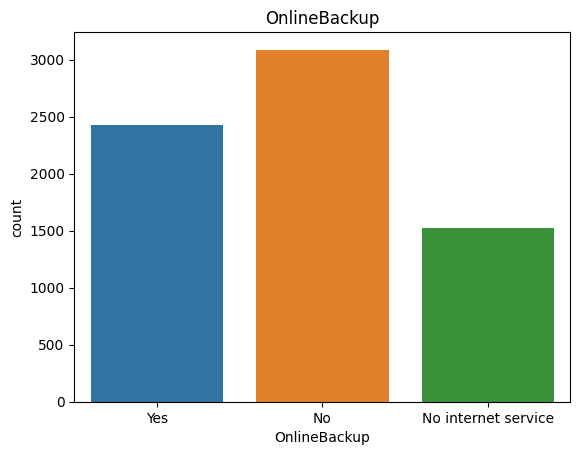

In [249]:
plt.title('OnlineBackup')
sns.countplot(data=df, x=df['OnlineBackup'])

Analysis of Online Backup

There is almost equal balance between the number of customers who have online backup compared to those who do not.

<AxesSubplot: title={'center': 'DeviceProtection'}, xlabel='DeviceProtection', ylabel='count'>

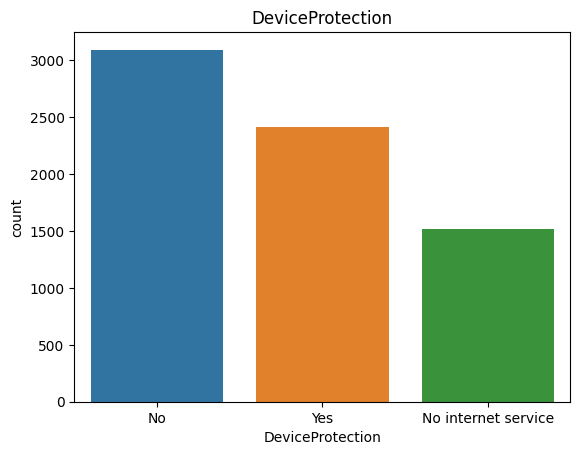

In [250]:
plt.title('DeviceProtection')
sns.countplot(data=df, x=df['DeviceProtection'])

There is almost 3000 people with no Device Protection and 2250 customers with some sort of device prediction (which is similar to the results seen in online security)

<AxesSubplot: title={'center': 'TechSupport'}, xlabel='TechSupport', ylabel='count'>

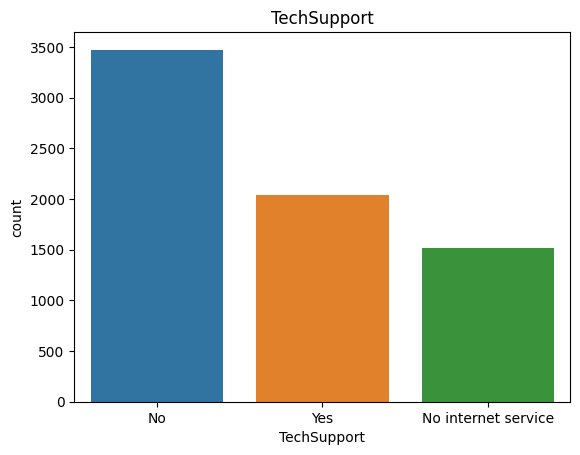

In [251]:
plt.title('TechSupport')
sns.countplot(data=df, x=df['TechSupport'])

The results are similar to Online Security and Device Protection. There are about 1250 people more who have no tech support compared to those who have tech support.


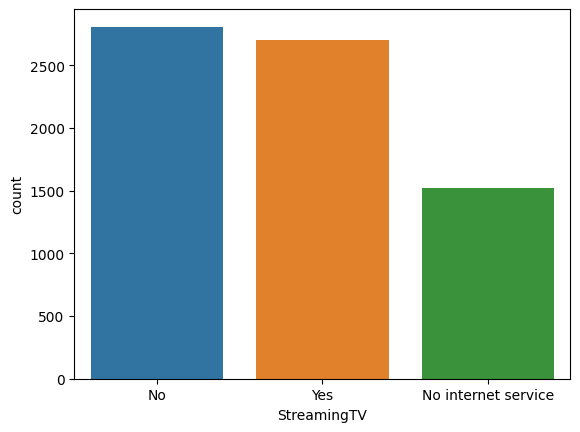

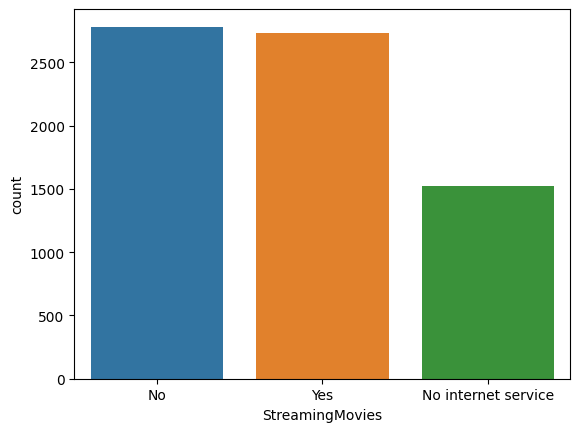

<AxesSubplot: xlabel='Contract', ylabel='count'>

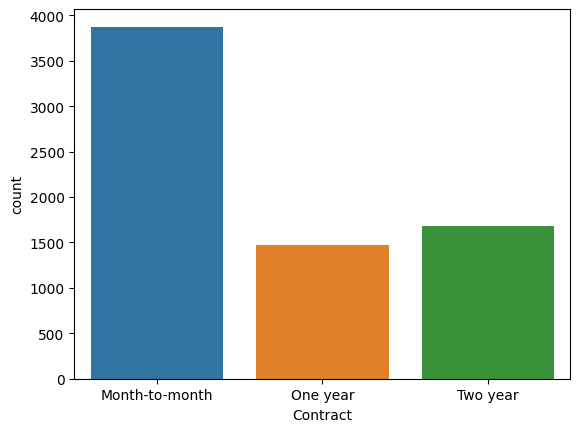

In [252]:
sns.countplot(data=df, x=df['StreamingTV'])
plt.show()
sns.countplot(data=df, x=df['StreamingMovies'])
plt.show()
sns.countplot(data=df, x=df['Contract'])

Almost a equal number of people stream movies and TV compared to those who dont. Also, most people prefer to take monthly subscriptions compared to yearly or biyearly subscriptions.

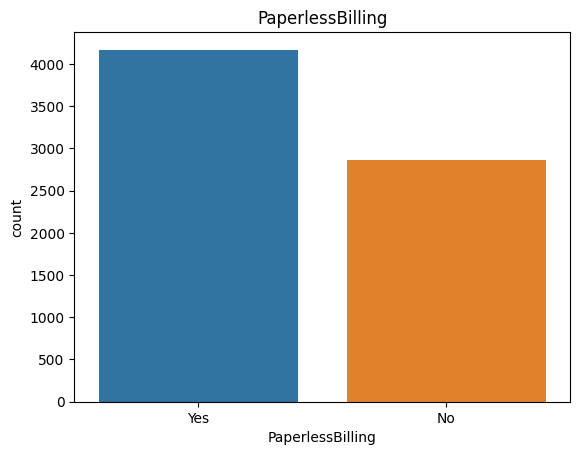

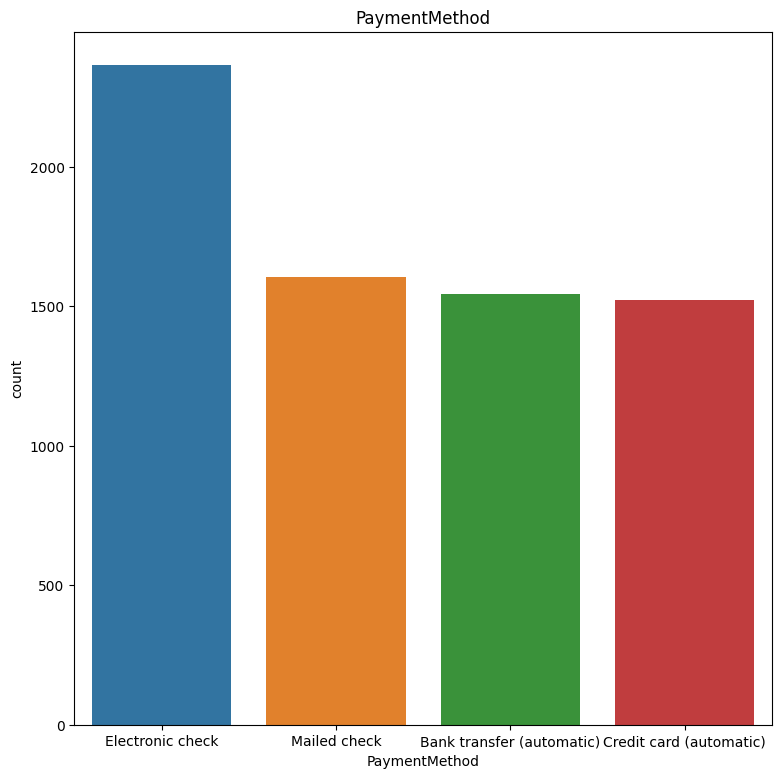

In [253]:
plt.title('PaperlessBilling')
sns.countplot(data=df, x=df['PaperlessBilling'])
plt.show()

plt.figure(figsize=(9,9))
plt.title('PaymentMethod')
sns.countplot(data=df, x=df['PaymentMethod'])
plt.show()

The number of people using paperless billing is must higher than those who dont (can also be observed by the Payment Method table, where msot people prefer Electronic Check, Bank or Credit Card Transfer).

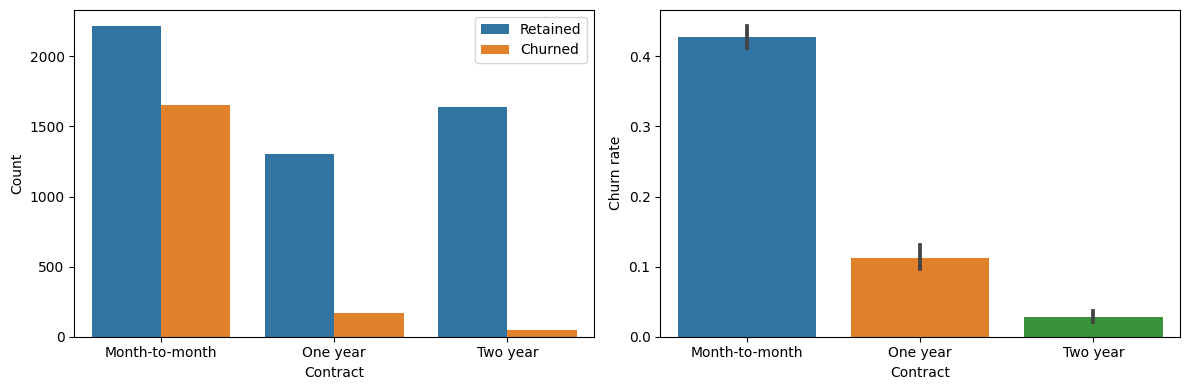

In [254]:
plot_categorical('Contract')

Analysis of Contract

Here, we can see that people with monthly subscriptions are more likely to Churn, while those who have biyearly or yearly subscriptions are less likely to Churn. \
Most people with yearly or biyearly subscriptions will most likely Retain than Churn. 

### Data Preprocessing

Listing out the keys in each column to determine best approach for preprocessing.

In [255]:
for category in categorical:
    print(category, " : ", set(list(df[category])))

gender  :  {'Female', 'Male'}
SeniorCitizen  :  {0, 1}
Partner  :  {'Yes', 'No'}
Dependents  :  {'Yes', 'No'}
PhoneService  :  {'Yes', 'No'}
MultipleLines  :  {'Yes', 'No phone service', 'No'}
InternetService  :  {'Fiber optic', 'DSL', 'No'}
OnlineSecurity  :  {'Yes', 'No internet service', 'No'}
OnlineBackup  :  {'Yes', 'No internet service', 'No'}
DeviceProtection  :  {'Yes', 'No internet service', 'No'}
TechSupport  :  {'Yes', 'No internet service', 'No'}
StreamingTV  :  {'Yes', 'No internet service', 'No'}
StreamingMovies  :  {'Yes', 'No internet service', 'No'}
Contract  :  {'One year', 'Two year', 'Month-to-month'}
PaperlessBilling  :  {'Yes', 'No'}
PaymentMethod  :  {'Mailed check', 'Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)'}


Data Preprocessing

Perform encoding for the categorical variables in the data frame

In [256]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['gender'] = LE.fit_transform(list(df['gender']))
df['SeniorCitizen'] = LE.fit_transform(list(df['SeniorCitizen']))
df['Partner'] = LE.fit_transform(list(df['Partner']))
df['Dependents'] = LE.fit_transform(list(df['Dependents']))
df['PhoneService'] = LE.fit_transform(list(df['PhoneService']))
df['PaperlessBilling'] = LE.fit_transform(list(df['PaperlessBilling']))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [257]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
df['MultipleLines']= OE.fit_transform(df.MultipleLines.values.reshape(-1,1))
df['InternetService'] = OE.fit_transform(df.InternetService.values.reshape(-1,1))
df['OnlineSecurity'] = OE.fit_transform(df.OnlineSecurity.values.reshape(-1,1))
df['OnlineBackup']=OE.fit_transform(df.OnlineBackup.values.reshape(-1,1))
df['DeviceProtection'] = OE.fit_transform(df.DeviceProtection.values.reshape(-1,1))
df['TechSupport'] = OE.fit_transform(df.TechSupport.values.reshape(-1,1))
df['StreamingTV']= OE.fit_transform(df.StreamingTV.values.reshape(-1,1))
df['StreamingMovies'] = OE.fit_transform(df.StreamingMovies.values.reshape(-1,1))
df['Contract']=OE.fit_transform(df.Contract.values.reshape(-1,1))
df['PaymentMethod']= OE.fit_transform(df.PaymentMethod.values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1,2.00,29.85,29.85,0
1,1,0,0,0,34,1,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,1.00,0,3.00,56.95,1889.50,0
2,1,0,0,0,2,1,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1,3.00,53.85,108.15,1
3,1,0,0,0,45,0,1.00,0.00,2.00,0.00,2.00,2.00,0.00,0.00,1.00,0,0.00,42.30,1840.75,0
4,0,0,0,0,2,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,2.00,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2.00,0.00,2.00,0.00,2.00,2.00,2.00,2.00,1.00,1,3.00,84.80,1990.50,0
7039,0,0,1,1,72,1,2.00,1.00,0.00,2.00,2.00,0.00,2.00,2.00,1.00,1,1.00,103.20,7362.90,0
7040,0,0,1,1,11,0,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1,2.00,29.60,346.45,0
7041,1,1,1,0,4,1,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,3.00,74.40,306.60,1


Check the data types of all values (categorical) in each column to determine if any conversion have to be made.

This is done because performing statisticaly measures on larger than required data types and non numerical types (ex : object) 
can give false results when calculating statistical results

In [258]:
# Check the data types of all values in each column to determine if any conversion have to be made.
print(df.dtypes)

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling      int32
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [259]:
# Saving a version of encoded file
df.to_csv('encoded.csv')

Because of encoding done earlier, all categorical variables are now represented as integer data tyeps. 

Now, we check the max / min range of these variables and perform data compression wherever appropriate

In [260]:
ii8 = np.iinfo(np.int8)
ii16 = np.iinfo(np.int16)
ii32 = np.iinfo(np.int32)
ii64 = np.iinfo(np.int64)

print(ii8.max)
for category in categorical:
    max_value = df[category].max()
    min_value = df[category].min()

    if max_value < ii8.max:
        print("Converting data types of ", category, " to int8 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int8)

    elif max_value < ii16.max:
        print("Converting data types of ", category, " to int16 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int16)

    elif max_value < ii32.max:
        print("Converting data types of ", category, " to int32 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int32)

    elif max_value < ii64.max:
        print("Converting data types of ", category, " to int64 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int64)

print("Data types after performing conversions:")
df.dtypes

127
Converting data types of  gender  to int8 as max value is only :  1
Converting data types of  SeniorCitizen  to int8 as max value is only :  1
Converting data types of  Partner  to int8 as max value is only :  1
Converting data types of  Dependents  to int8 as max value is only :  1
Converting data types of  PhoneService  to int8 as max value is only :  1
Converting data types of  MultipleLines  to int8 as max value is only :  2.0
Converting data types of  InternetService  to int8 as max value is only :  2.0
Converting data types of  OnlineSecurity  to int8 as max value is only :  2.0
Converting data types of  OnlineBackup  to int8 as max value is only :  2.0
Converting data types of  DeviceProtection  to int8 as max value is only :  2.0
Converting data types of  TechSupport  to int8 as max value is only :  2.0
Converting data types of  StreamingTV  to int8 as max value is only :  2.0
Converting data types of  StreamingMovies  to int8 as max value is only :  2.0
Converting data typ

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

We can observe that TotalCharges has a data type of float64. We check the range of values it holds to determine if casting to a 
smaller type (float16, for example) is possible.

In [261]:
f16 = np.finfo(np.float16)
f32 = np.finfo(np.float32)
f64 = np.finfo(np.float64)

category = 'TotalCharges'

max_value = df[category].max()
min_value = df[category].min()


if max_value < f16.max:
    print("Converting data types of ", category, " to f16 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float16)

elif max_value < f32.max:
    print("Converting data types of ", category, " to f32 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float32)

elif max_value < f64.max:
    print("Converting data types of ", category, " to f64 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float64)

print("New data type of ", category, " : ", df[category].dtype)

Converting data types of  TotalCharges  to f16 as max value is only :  8684.8
New data type of  TotalCharges  :  float16


## Plotting 

<AxesSubplot: >

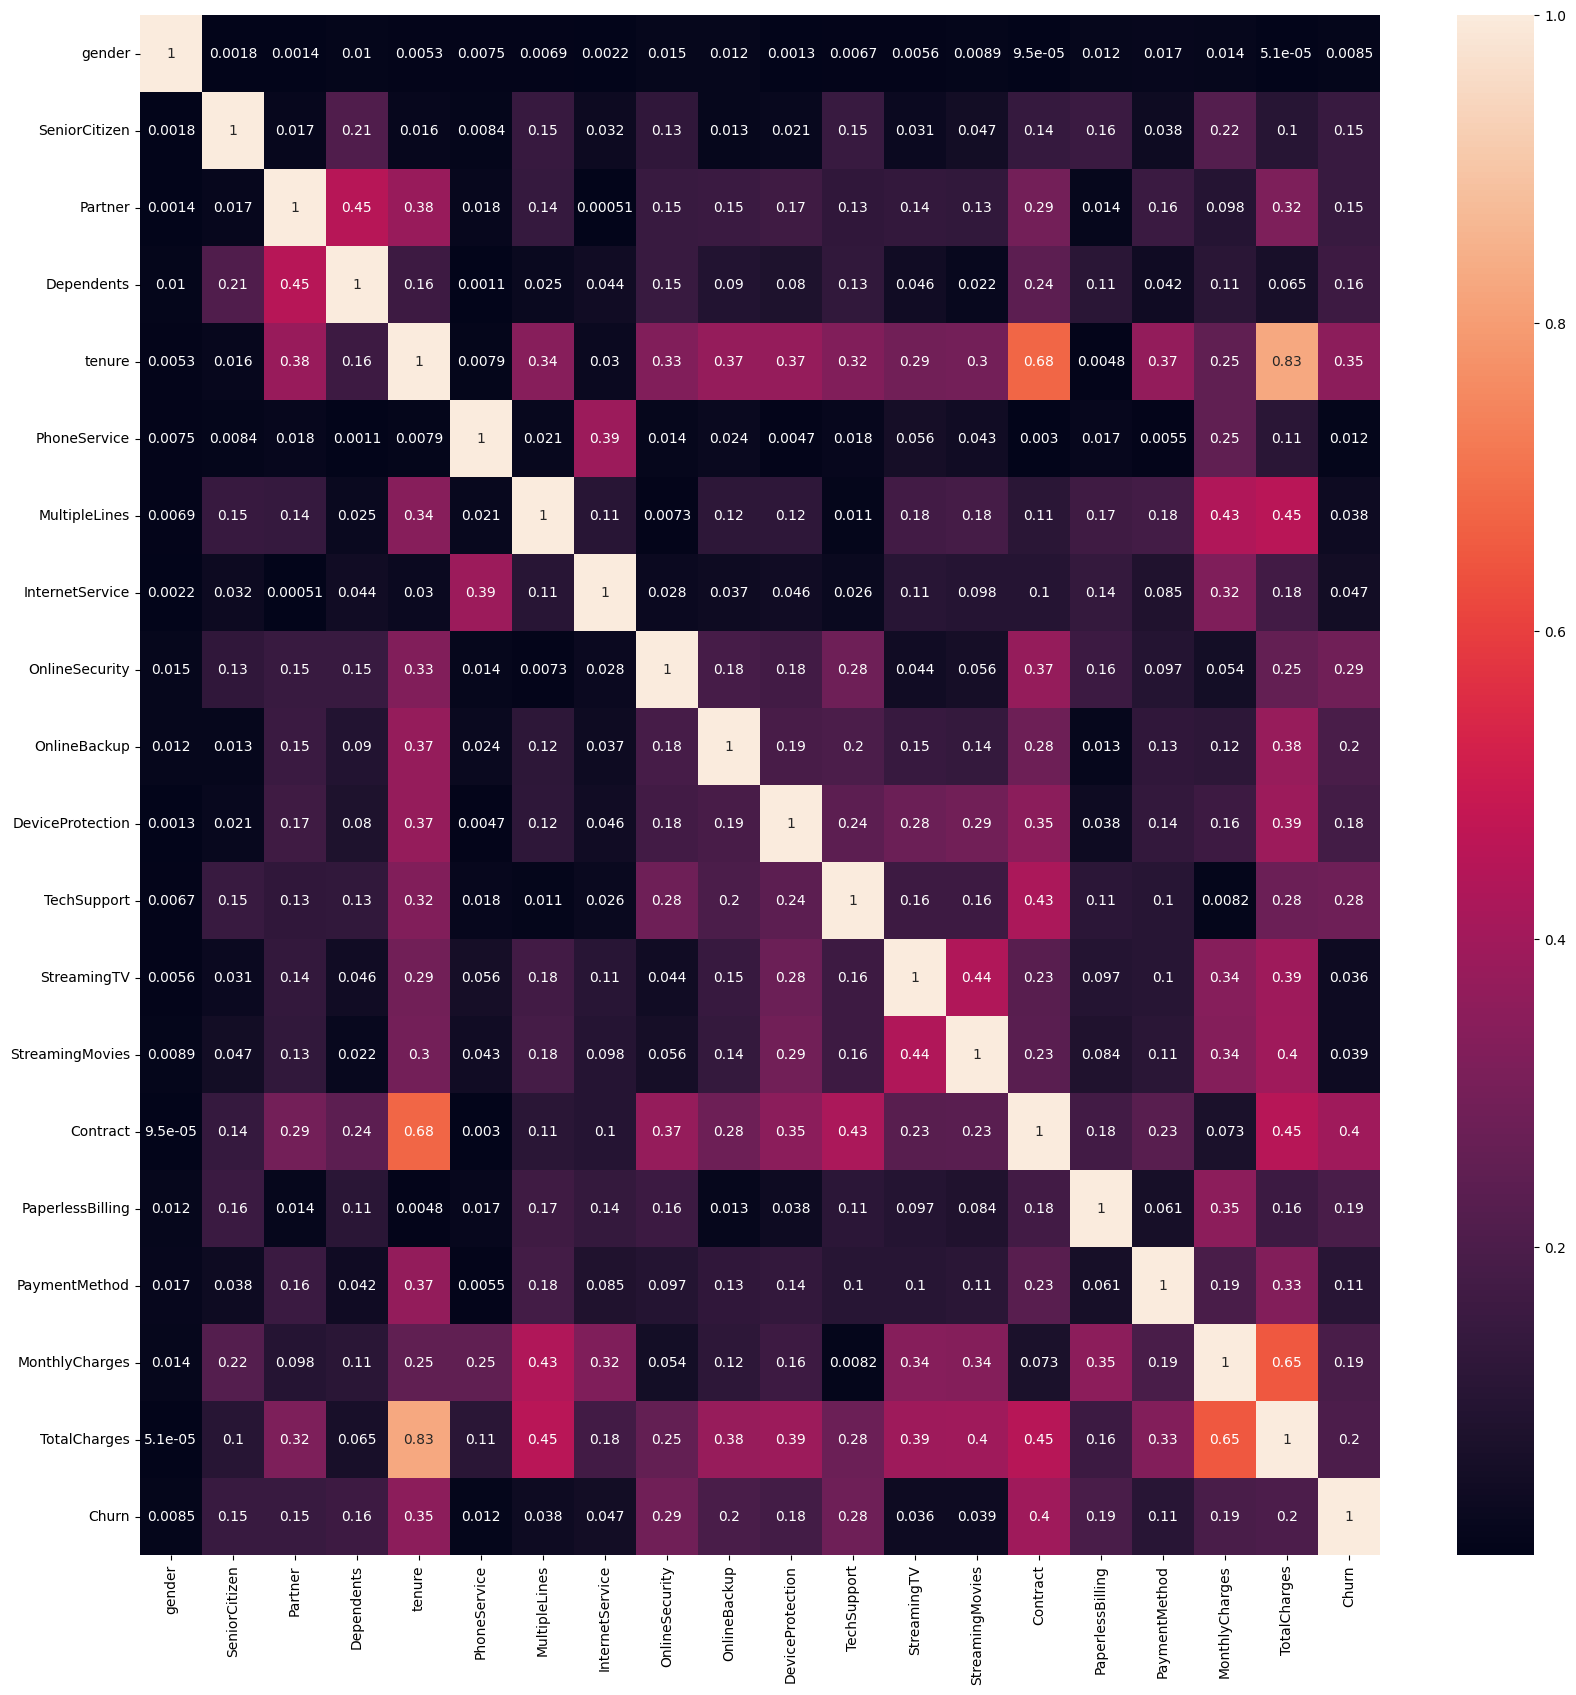

In [262]:
corr = abs(df.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

Analysis of the HeatMap (correlation Map):

* Correlation between target (Churn) and independent variables \
    We can see the independent variables (gender, phoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, PaymentMethod) have a correlation value < 0.15 when compared to Churn.
    This implies that we cannot directly uses these variables for prediction using linear regression, but we can definitely use multiple regression, decision tree etc

* Correlation between the independent variables \
    We can see that between the independent variables, the pairs (Contract, Tenure), (TotalCharges, Tenure) and (MonthlyCharges, TotalCharges) have very high correlation values. This significant intercorrelation can cause multicollinearity problems.

Determining which records contribute more towards Churn:

* Correlations of Contract, TotalCharges, and MonthlyCharges, Tenure vs Churn 
    >Contract -> 0.68 \
    TotalCharges -> 0.83 \
    MonthlyCharges -> 0.25 \
    Tenure -> 0.35 

    We could drop MonthlyCharges and Tenure in favour of TotalCharges and MonthlyCharges as the laters have higher correlation with the Target variable. Doing so would remove multicollinearity problems.


Determining outliers in Continuos variables

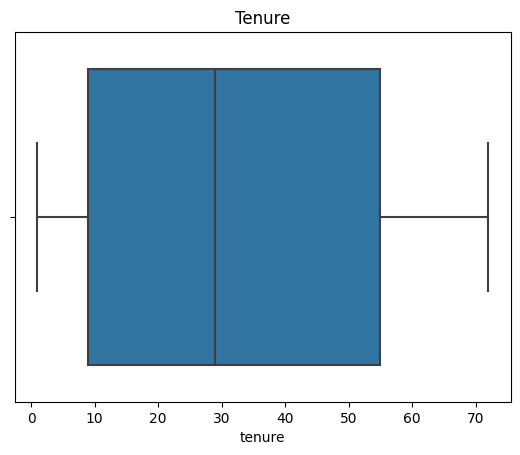

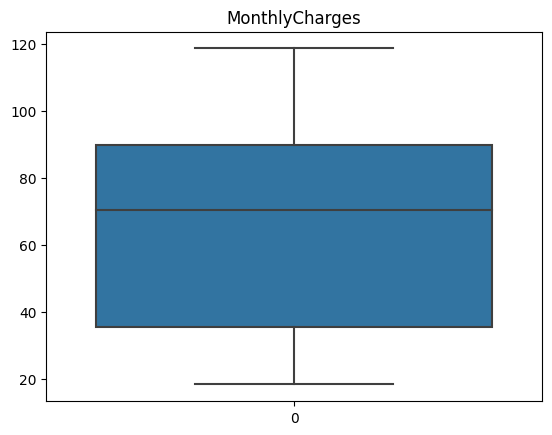

<AxesSubplot: title={'center': 'TotalCharges'}>

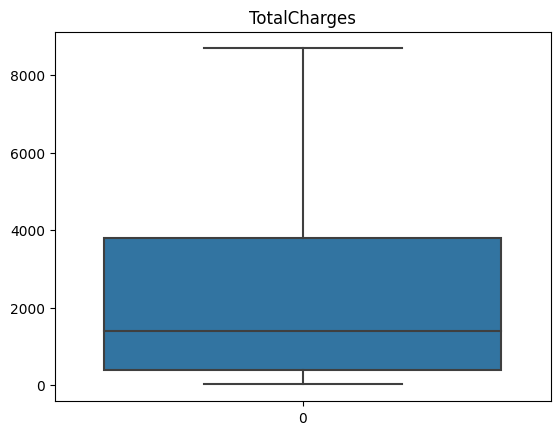

In [263]:
plt.title("Tenure")
sns.boxplot(data=df, x=df['tenure'])
plt.show()

plt.title("MonthlyCharges")
sns.boxplot(data=df['MonthlyCharges'])
plt.show()

plt.title("TotalCharges")
sns.boxplot(data=df['TotalCharges'])

There is no outliers in the continuous variables.

View continuous variables in a histogram to determine if scaling should be used.

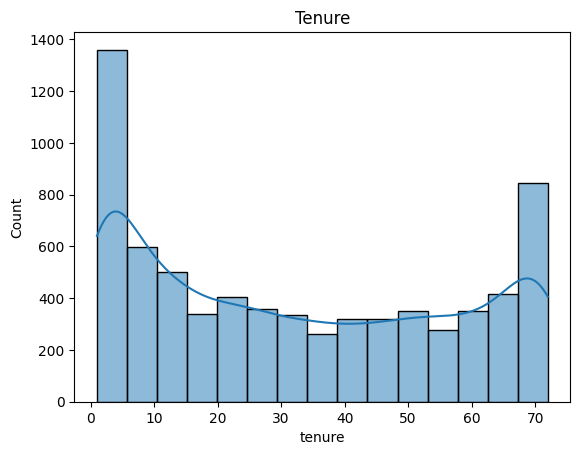

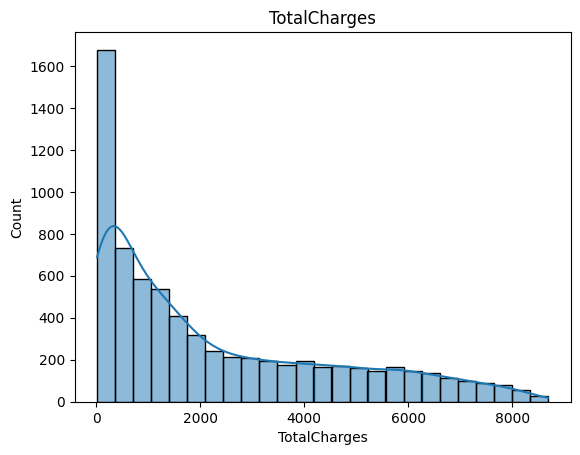

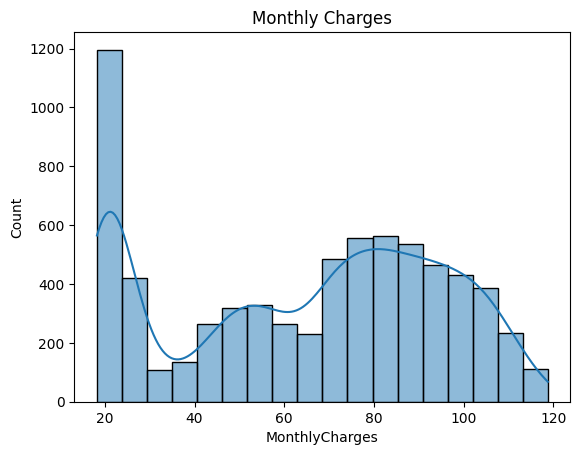

In [264]:
plt.title('Tenure')
sns.histplot(data=df, x=df['tenure'], kde=True)
plt.show()

plt.title('TotalCharges')
sns.histplot(data=df, x=df['TotalCharges'], kde=True)
plt.show()

plt.title('Monthly Charges')
sns.histplot(data=df, x=df['MonthlyCharges'], kde=True)
plt.show()

Inferences
> None of the continuos variables match normal distribution.
> The second graph (i.e TotalCharges) can be scaled using min max scaling as the data should a continuous decreasing trend.
> The third graph (i.e MonthlyCharges) varies on a random basis.


In [265]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.84,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1890.00,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.12,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1841.00,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.62,1


In [266]:
# Train and Test split
from sklearn.model_selection import train_test_split as tts 
traindf, testdf = tts(df,test_size=0.2,random_state=42)
print(f"The dimensions of train data frame is {traindf.shape} and test data frame is {testdf.shape}")

The dimensions of train data frame is (5625, 20) and test data frame is (1407, 20)


In [267]:
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float16
Churn                 int32
dtype: object

In [268]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.84,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1890.00,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.12,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1841.00,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.00,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7364.00,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.50,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.50,1


## Review 2 starts here

<b> Performing PCA on the dataset to gain more insight before modelling

<p> PCA is a powerful tool used to reduce the space dimensionality and produce uncorrelated features. It helps to gain classification insights about the data through clear visual representation of the dataset (in 2D)

In [269]:
data = pd.read_csv('encoded.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1,2.00,29.85,29.85,0
1,1,0,0,0,34,1,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,1.00,0,3.00,56.95,1889.50,0
2,1,0,0,0,2,1,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1,3.00,53.85,108.15,1
3,1,0,0,0,45,0,1.00,0.00,2.00,0.00,2.00,2.00,0.00,0.00,1.00,0,0.00,42.30,1840.75,0
4,0,0,0,0,2,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,2.00,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2.00,0.00,2.00,0.00,2.00,2.00,2.00,2.00,1.00,1,3.00,84.80,1990.50,0
7028,0,0,1,1,72,1,2.00,1.00,0.00,2.00,2.00,0.00,2.00,2.00,1.00,1,1.00,103.20,7362.90,0
7029,0,0,1,1,11,0,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1,2.00,29.60,346.45,0
7030,1,1,1,0,4,1,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,3.00,74.40,306.60,1


Text(0, 0.5, 'PC2')

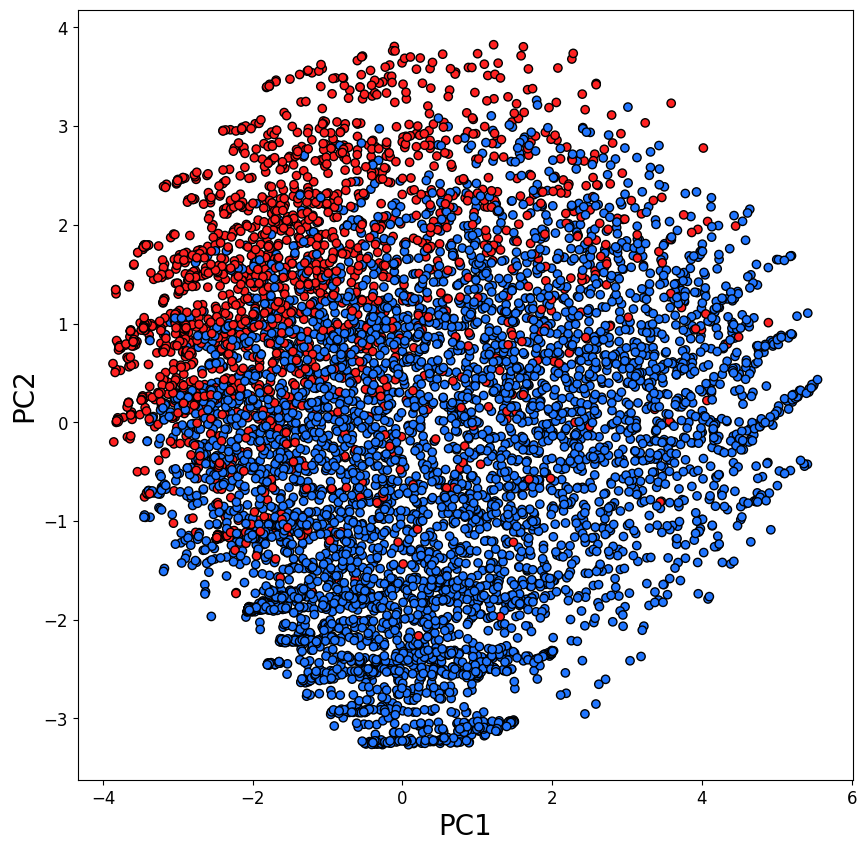

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in data['Churn']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Gender",size=20)
plt.xlabel('SeniorCitizen',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

<i> <b> Inference: </b> The reason why there is no clear separation in data is because PCA is not a fool-proof method of data visuvalization. The contribution of PC1 and PC2 ("Gender" and "SeniorCitizen") maybe very less.

Text(0, 0.5, 'Proportion of Variance Explained')

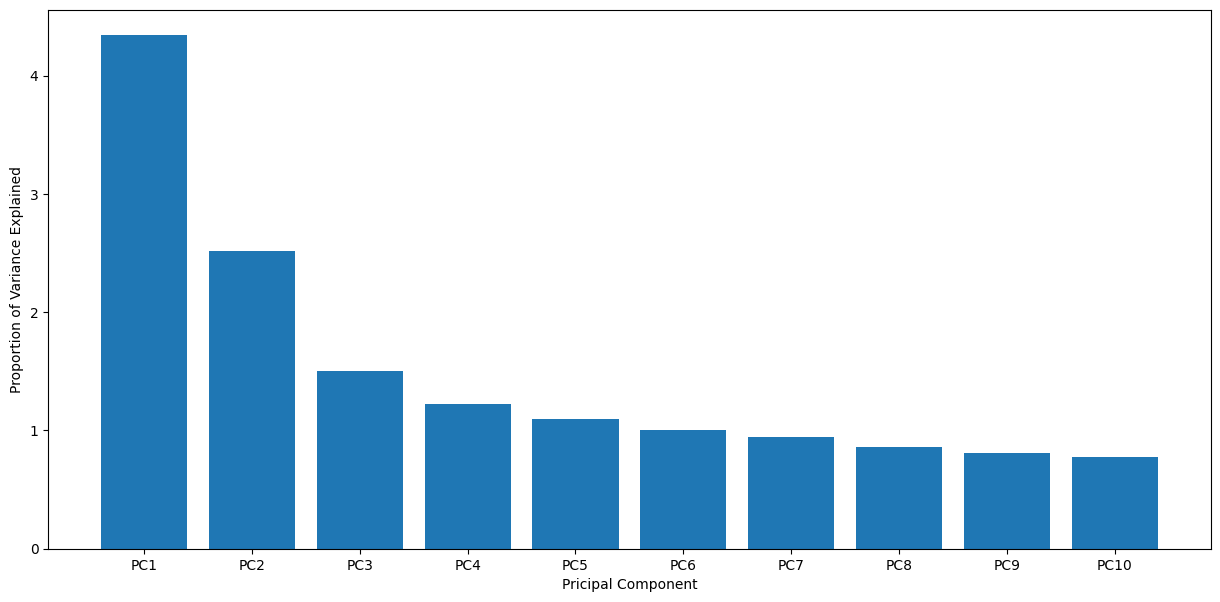

In [271]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

<i> It can be noted here that PC1 and PC2 together only contribute to < 10% of the variance in data hence it cannot be a good indication of the variance shown in the dataset.

<b> Alternative workaround for getting proper visuvalizations from PCA

In [272]:
churn_corr_df = (np.abs(df.corr()).sort_values(by='Churn',ascending=False))[['Churn']]
churn_corr_df.drop('Churn',inplace=True)
churn_corr_df

,Churn
Contract,0.40
tenure,0.35
OnlineSecurity,0.29
TechSupport,0.28
TotalCharges,0.20
OnlineBackup,0.20
MonthlyCharges,0.19
PaperlessBilling,0.19
DeviceProtection,0.18
Dependents,0.16


In [273]:
group_1 = list(churn_corr_df[:6].index)
group_2 = list(churn_corr_df[6:12].index)

group_1_df = data.loc[:,group_1]
group_2_df = data.loc[:,group_2]

Text(0, 0.5, 'PC2')

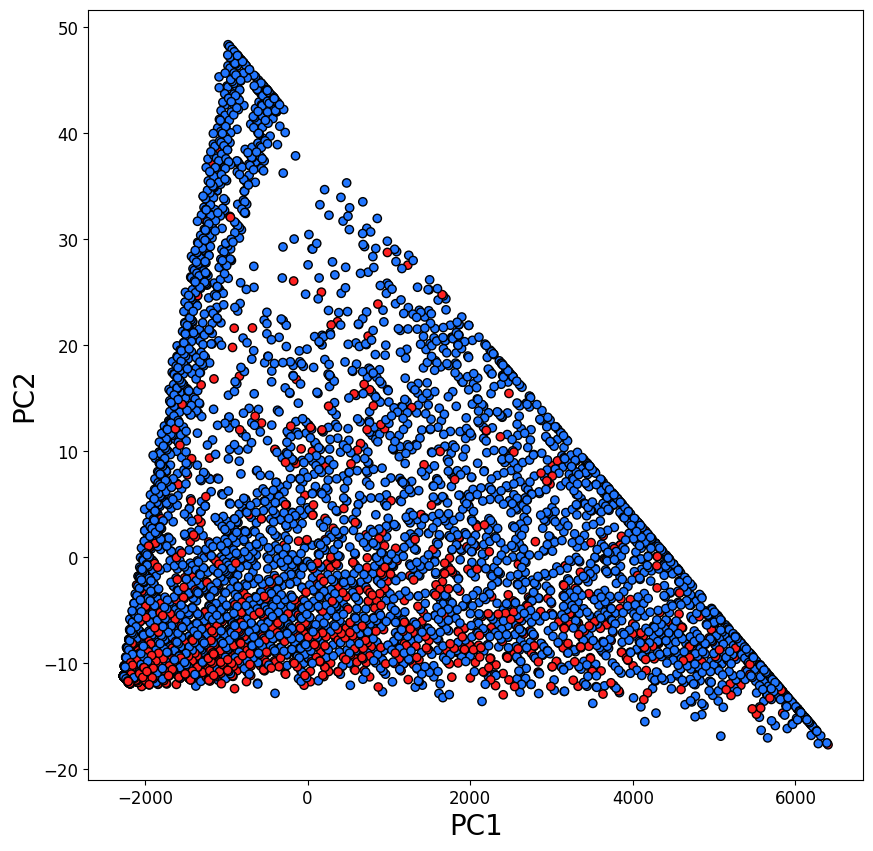

In [274]:
# group_1 dataset
#Obtain principal components
pca = PCA().fit(group_1_df)

pc = pca.transform(group_1_df)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in data['Churn']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Contract",size=20)
plt.xlabel("Tenure",size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

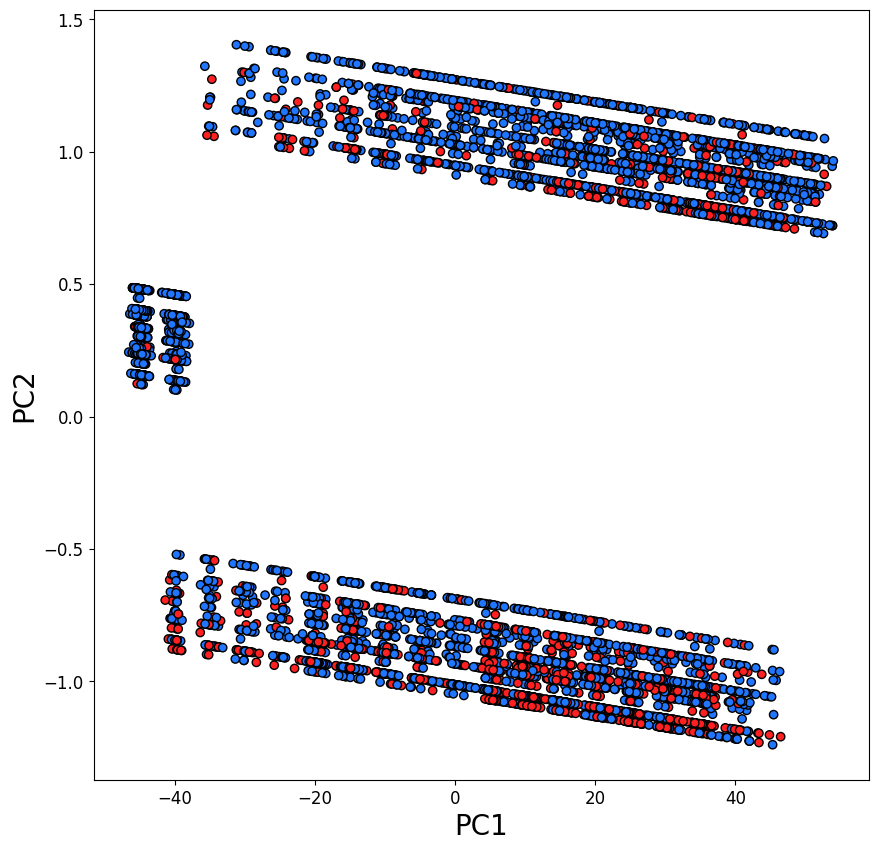

In [275]:
# group_2 dataset
#Obtain principal components
pca = PCA().fit(group_2_df)

pc = pca.transform(group_2_df)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in data['Churn']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Monthly charges",size=20)
plt.xlabel("Paperless bill",size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

<i> Still the workaround did'nt help and the same issue persists

<b> K-Means clustering

In [276]:
kX = df.iloc[:,:-1]
ky = df['Churn']
kx_train, kx_test, ky_train, ky_test = tts(kX,ky, test_size=0.2)

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

classifier = LogisticRegression()
classifier.fit(kx_train,ky_train)
kmeans = KMeans(n_clusters=2, random_state=0).fit(kx_train)

In [278]:
classifier.score(kx_test, ky_test)

0.8130774697938877

In [279]:
np.sum(kmeans.predict(kx_test)==ky_test)/ky_test.shape[0]

0.488272921108742

In [280]:
# Formal try
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

class clust():
    def _load_data(self, df):
        X = df.iloc[:,:-1]
        y = df['Churn']
        self.X_train, self.X_test, self.y_train, self.y_test = tts(X, y, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

In [281]:
clust(data).classify()

Accuracy: 0.7938388625592417


In [282]:
clust(data).Kmeans('add').classify()

Accuracy: 0.7895734597156399


<b> Setting up the dataset </b>
<ul>
<li> Removing the class imbalance over random samples beign generated. 
<li> Dropping TotalCharges as it has high correlation between Monthly charges and Tenure
</ol>


In [283]:
df.drop('TotalCharges',axis=1 ,inplace=True)
X = df.iloc[:,:-1]
y = df['Churn']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
x_train, x_test, y_train, y_test = tts(X,y,test_size=0.2)

Using Lazy learning to train a collection of ML models with thier respective accuracies

In [284]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.91,0.91,0.91,0.94
RandomForestClassifier,0.90,0.90,0.90,0.90,0.95
BaggingClassifier,0.89,0.89,0.89,0.89,0.24
DecisionTreeClassifier,0.87,0.88,0.88,0.87,0.06
ExtraTreeClassifier,0.86,0.86,0.86,0.86,0.04
XGBClassifier,0.86,0.86,0.86,0.86,0.43
LabelSpreading,0.85,0.85,0.85,0.85,6.64
LabelPropagation,0.85,0.85,0.85,0.85,4.97
LGBMClassifier,0.82,0.83,0.83,0.82,0.18


In [285]:
# Keep track of all accuracies encountered thus far.

accuracies = {}

<b> Simple candidate model </b>

1. Decision Tree

In [286]:
# DT
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred_DT = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_DT))

accuracies['DT'] = accuracy_score(y_test, y_pred_DT)

0.8727008712487899


2. K-Nearest Neighbours

In [287]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred_KNN = model.predict(x_test)
print(accuracy_score(y_test, y_pred_KNN))

accuracies['KNN'] = accuracy_score(y_test, y_pred_KNN)

0.7957405614714425


3. Support Vector Machines

In [288]:
# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
y_pred_SVM = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_SVM))

accuracies['SVM'] = accuracy_score(y_test, y_pred_SVM)

0.8146176185866408


4. Gaussian Naive Bayes

In [289]:
# GNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred_GNB = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_GNB))

accuracies['GNB'] = accuracy_score(y_test, y_pred_GNB)

0.744917715392062


5. Multi Layer Perceptron

In [290]:
# MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
y_pred_MLP = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_MLP))

accuracies['MLP'] = accuracy_score(y_test, y_pred_MLP)

0.7691190706679574


6. Logistic Regression

In [291]:
# Logisitic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred_LOG = clf.predict(x_test)
print("LogReg: ",accuracy_score(y_test, y_pred_LOG))

accuracies['LogReg'] = accuracy_score(y_test, y_pred_LOG)

LogReg:  0.7657308809293321


7. Extra Trees Classifier

In [326]:
# Extra Trees Classifier
from sklearn.tree import ExtraTreeClassifier
clf = ExtraTreeClassifier(random_state=0).fit(x_train, y_train)
y_pred_ETC = (clf.predict(x_test))
print("Extra Trees: ",accuracy_score(y_test, y_pred_ETC))

accuracies['ETC'] = accuracy_score(y_test, y_pred_ETC)

Extra Trees:  0.8731848983543078


<b> Make dataframe of predictions

In [302]:
pred_df = pd.DataFrame(list(zip(y_pred_DT, y_pred_KNN, y_pred_SVM, y_pred_GNB, y_pred_MLP, y_pred_LOG, y_pred_ETC, y_test)), columns=['DT','KNN','SVM','GNB', 'MLP','LOG_REG', 'Extra Trees', 'Test'])
pred_df

,DT,KNN,SVM,GNB,MLP,LOG_REG,Extra Trees,Test
0,1,0,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1
4,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
2061,0,0,0,0,0,0,0,0
2062,1,0,0,1,1,1,0,0
2063,0,0,0,0,0,0,0,0
2064,0,0,1,1,1,1,1,0


<b> Display accuracies each model has delivered so far

In [303]:
ac = pd.DataFrame(accuracies, index=[0])
ac

,DT,KNN,SVM,GNB,MLP,LogReg,ETC
0,0.87,0.80,0.81,0.74,0.77,0.77,0.87


<b> Simple ensembling techniques </b>
<ol>
<li> Max voting
<li> Averaging 
<li> Weighted averaging
</ol>
<i> Since churn prediction is a classification problem the last two are not applicable as they are meant for regression. Only max voting is applicable among the list of simple ensembling techniques

<b> 1. Max voting

In [304]:
import scipy.stats as st

y_pred_MAX = np.zeros(y_test.shape[0])
for i in range(y_pred_MAX.shape[0]-1):
    y_pred_MAX[i] = st.mode(pred_df.iloc[i,:]).mode
accuracy_score(y_test, y_pred_MAX)

0.8422071636011617

<b> Advanced Ensemble Techniques </b>
<ol>
<li> Stacking 
<li> Bagging
<li> Boosting
</ol>

<i> The outputs from the above 6 candidate models will be used as input for a new meta learner. The output of the meta learner is the one compared and validated using an accuracy score.

<b>1. Stacking

In [306]:
X = pred_df.iloc[:,:-1]
y = pred_df['Test']
meta_x_train, meta_x_test, meta_y_train, meta_y_test = tts(X,y,test_size=0.2)
print(meta_x_train.shape)
print(meta_y_train.shape)
print(meta_x_test.shape)
print(meta_y_test.shape)

(1652, 7)
(1652,)
(414, 7)
(414,)


<b>List of meta learners used </b>
<ol>
<li>KNN
<li>DT
<li>EXTRA TREES CLASSIFIER
<li>SVM
<li>GNB
<li>ADABOOST
<li>BAGGING
<li>MLP
<li>Logistic Regression
</ol>

In [307]:
# KNN
knn_lis = []
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(meta_x_train, meta_y_train)
y_pred_1 = model.predict(meta_x_test)
knn_lis.append(accuracy_score(meta_y_test, y_pred_1)*100)
# DT
dt_lis = []
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(meta_x_train, meta_y_train)
y_pred_2 = clf.predict(meta_x_test)
dt_lis.append(accuracy_score(meta_y_test, y_pred_2)*100)

# Extra Trees Classifier
etc_lis= []
from sklearn.tree import ExtraTreeClassifier
clf = ExtraTreeClassifier(random_state=0)
clf.fit(meta_x_train, meta_y_train)
y_pred_etc = clf.predict(meta_x_test)
etc_lis.append(accuracy_score(meta_y_test, y_pred_etc)*100)

# SVM
svm_lis = []
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(meta_x_train, meta_y_train)
y_pred_3 = clf.predict(meta_x_test)
svm_lis.append(accuracy_score(meta_y_test, y_pred_3)*100)
# GNB
gnb_lis = []
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(meta_x_train, meta_y_train)
y_pred_4 = clf.predict(meta_x_test)
gnb_lis.append(accuracy_score(meta_y_test, y_pred_4)*100)
# AdaBoost
ada_lis = []
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(meta_x_train, meta_y_train)
y_pred_5 = clf.predict(meta_x_test)
ada_lis.append(accuracy_score(meta_y_test, y_pred_5)*100)
# Bagging classifier
bag_lis = []
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(meta_x_train, meta_y_train)
y_pred_6 = clf.predict(meta_x_test)
bag_lis.append(accuracy_score(meta_y_test, y_pred_6)*100)

# MLP
mlp_lis = []
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(meta_x_train, meta_y_train)
y_pred_7 = clf.predict(meta_x_test)
mlp_lis.append(accuracy_score(meta_y_test, y_pred_7)*100)

# Logisitic Regression
log_lis = []
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(meta_x_train, meta_y_train)
y_pred_8 = clf.predict(meta_x_test)
log_lis.append(accuracy_score(meta_y_test, y_pred_8)*100)

ens_res = pd.DataFrame(list(list(zip(knn_lis, dt_lis, etc_lis, svm_lis, gnb_lis, ada_lis, bag_lis, mlp_lis, log_lis))[0]), columns=['Accuracy'],index=['KNN','DT', 'ETC', 'SVM','GNB', 'ADABOOST','BAGGING','MLP','LOG_REG'])
ens_res

,Accuracy
KNN,88.89
DT,88.89
ETC,88.89
SVM,88.89
GNB,82.61
ADABOOST,86.47
BAGGING,88.89
MLP,88.89
LOG_REG,88.89


In [311]:
acc = float(ens_res['Accuracy'].max())
max_ind = list(ens_res.idxmax())[0]
print(f"Max accuracy from stacking is {round(acc,3)}% with meta learner {max_ind}")

Max accuracy from stacking is 88.889% with meta learner KNN


<b>2. Bagging </b>
<ol>
<li> Random forest
<li> Bagging classifier
<li> Bagging meta-estimator
</ol>

<b> 2.1 Random forest

Random Forest Classifier with 100 n_estimators and 'gini' criterion gives an accuracy of 89.545%


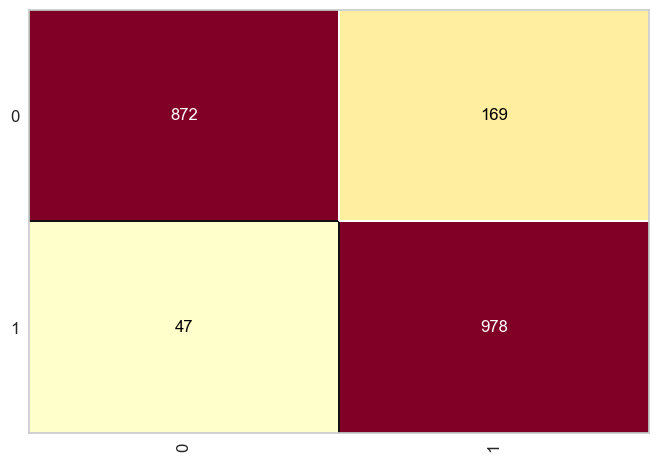

In [312]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
random_forest.fit(x_train, y_train)
previsoes = random_forest.predict(x_test)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
print(f"Random Forest Classifier with {100} n_estimators and 'gini' criterion gives an accuracy of {round(cm.score(x_test, y_test)*100,3)}%")

<b> 2.2 Bagging classifier

In [313]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(x_train, y_train)
y_pred_6 = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_6))

0.7487899322362053


<b> 2.3 Bagging meta-estimator

In [314]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8867376573088093

<b>3. Boosting </b>
<ol>
<li> CatBoost
<li> Light Gradient Boost Machine
<li> AdaBoost
<li> Gradient Boost Machine
<li> Extreme Gradient Boost Machine
<li> Histogram Based Gradient Machine
<ol>

<b> 3.1 CatBoost

In [319]:
import catboost as ctb
model_ctb = ctb.CatBoostClassifier()
model_ctb.fit(x_train, y_train)
expected_y = y_test 
predicted_y = model_ctb.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
print(f"CatBoost method of Boosting gives an accuracy of {round(metrics.accuracy_score(expected_y, predicted_y)*100,3)}%")

Learning rate set to 0.02538
0:	learn: 0.6804969	total: 163ms	remaining: 2m 42s
1:	learn: 0.6707588	total: 170ms	remaining: 1m 24s
2:	learn: 0.6602504	total: 178ms	remaining: 59.2s
3:	learn: 0.6506732	total: 186ms	remaining: 46.3s
4:	learn: 0.6411224	total: 196ms	remaining: 39s
5:	learn: 0.6322451	total: 205ms	remaining: 33.9s
6:	learn: 0.6233216	total: 213ms	remaining: 30.3s
7:	learn: 0.6159554	total: 220ms	remaining: 27.3s
8:	learn: 0.6081245	total: 230ms	remaining: 25.3s
9:	learn: 0.6019748	total: 239ms	remaining: 23.6s
10:	learn: 0.5957780	total: 247ms	remaining: 22.2s
11:	learn: 0.5897385	total: 256ms	remaining: 21.1s
12:	learn: 0.5837094	total: 264ms	remaining: 20s
13:	learn: 0.5784570	total: 273ms	remaining: 19.3s
14:	learn: 0.5735909	total: 280ms	remaining: 18.4s
15:	learn: 0.5686332	total: 289ms	remaining: 17.8s
16:	learn: 0.5637415	total: 296ms	remaining: 17.1s
17:	learn: 0.5593561	total: 304ms	remaining: 16.6s
18:	learn: 0.5558351	total: 311ms	remaining: 16s
19:	learn: 0.552

<b> 3.2 Light Gradient Boost Machine

In [320]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f"LGBM method of Boosting gives an accuracy of {round(metrics.accuracy_score(y_test, y_pred)*100,3)}%")

LGBM method of Boosting gives an accuracy of 82.043%


<b> 3.3 AdaBoost

In [76]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred_5 = clf.predict(x_test)
print(f"AdaBoost method of Boosting gives an accuracy of {round(metrics.accuracy_score(y_test, y_pred_5)*100,3)}%")

AdaBoost method of Boosting gives an accuracy of 77.154%


<b> 3.4 Gradient Boost Machine

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
print(f"AdaBoost method of Boosting gives an accuracy of {round(model.score(x_test,y_test)*100,3)}%")

AdaBoost method of Boosting gives an accuracy of 75.218%


<b> 3.5 Extreme Gradient Boost Machine

In [315]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train, y_train)
print(f"Gradient Boost method of Boosting gives an accuracy of {round(model.score(x_test,y_test)*100,3)}%")

Gradient Boost method of Boosting gives an accuracy of 85.673%


<b> 3.5 Histogram Based Gradietn Boost Machine

In [316]:
from sklearn.ensemble import HistGradientBoostingClassifier

model= HistGradientBoostingClassifier()
model.fit(x_train, y_train)
print(f"Histogram based Gradient Boost method of Boosting gives an accuracy of {round(model.score(x_test,y_test)*100,3)}%")

Histogram based Gradient Boost method of Boosting gives an accuracy of 82.769%


## Improvements using GridSearchCV

<b> Logistic Regression using GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train,y_train)
print("Accuracy :",clf.best_score_)        

Accuracy : 0.7613801452784503


In [79]:
from sklearn.model_selection import GridSearchCV
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [80]:
model = tree.DecisionTreeClassifier()

In [81]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [82]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [83]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.8012106537530267


<b> Random Forest using Grid Search CV

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [86]:
model = RandomForestClassifier()

In [87]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [88]:
gridRandomForest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [89]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  entropy
Score:  0.8759079903147701


In [90]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [91]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [92]:
previsoes = random_forest.predict(x_test)

0.888189738625363

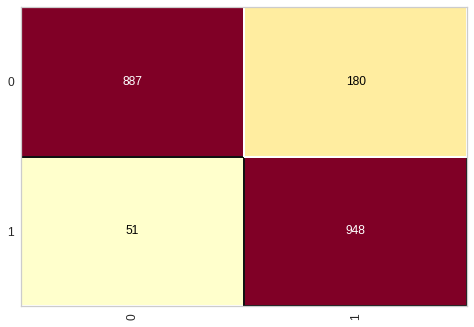

In [93]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

<b> AutoKeras

In [94]:
import autokeras as ak

2023-01-05 08:15:14.236575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 08:15:16.153773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 08:15:16.153852: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 08:15:16.281460: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-05 08:15:33.289871: W tensorflow/stream_executor/platform/de

In [95]:
clf = ak.StructuredDataClassifier(max_trials=10,seed=1234)
# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=50, validation_split=0.2)
# Predict with the best model.
predicted_y = clf.predict(x_test)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_classifier/tuner0.json


2023-01-05 08:16:00.634922: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-05 08:16:00.634973: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (minato-lap): /proc/driver/nvidia/version does not exist
2023-01-05 08:16:00.636179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Oracle triggered exit
Epoch 1/50
259/259 [==============================] - 2s 3ms/step - loss: 0.6417 - accuracy: 0.6646
Epoch 2/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5407 - accuracy: 0.7390
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5000 - accuracy: 0.7571
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4862 - accuracy: 0.7609
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.7651
Epoch 6/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7694
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4654 - accuracy: 0.7743
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.7782
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7815
Epoch 10/50
259/259 [==============================] - 1s 3ms/

In [96]:
predicted = clf.predict(x_test)

65/65 [==============================] - 0s 4ms/step


In [97]:
from sklearn.metrics import classification_report
print("classification report for neural network")
print(classification_report(predicted,y_test))

classification report for neural network
              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       937
         1.0       0.84      0.75      0.79      1129

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



<b> ANN

In [98]:
import tensorflow as tf

In [99]:
x_train.shape[1]

18

In [100]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

test_score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss: ", test_score[0])
print("Test accuracy: ", test_score[1])
model.summary()

Epoch 1/40
661/661 [==============================] - 3s 3ms/step - loss: 0.6018 - accuracy: 0.7291 - val_loss: 0.4909 - val_accuracy: 0.7772
Epoch 2/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7494 - val_loss: 0.5836 - val_accuracy: 0.7052
Epoch 3/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5132 - accuracy: 0.7526 - val_loss: 0.5509 - val_accuracy: 0.7464
Epoch 4/40
661/661 [==============================] - 2s 3ms/step - loss: 0.5157 - accuracy: 0.7509 - val_loss: 0.5452 - val_accuracy: 0.7270
Epoch 5/40
661/661 [==============================] - 2s 2ms/step - loss: 0.5139 - accuracy: 0.7476 - val_loss: 0.4953 - val_accuracy: 0.7724
Epoch 6/40
661/661 [==============================] - 1s 2ms/step - loss: 0.5136 - accuracy: 0.7461 - val_loss: 0.4842 - val_accuracy: 0.7772
Epoch 7/40
661/661 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7458 - val_loss: 0.5953 - val_accuracy: 0.7367
Epoch 

In [101]:
print("Test loss: ", test_score[0])
print("Test accuracy: ", test_score[1])

Test loss:  0.47234728932380676
Test accuracy:  0.7725072503089905


<b> Multilevel stacking

In [102]:
pred_df

,DT,KNN,SVM,GNB,MLP,LOG_REG,Test
0,1,0,0,1,1,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
2061,0,0,0,0,0,0,0
2062,0,0,0,0,0,0,0
2063,1,1,1,1,1,1,0
2064,1,1,1,1,1,1,1


In [103]:
multi_pred_df = pd.DataFrame()
inter_acc_df = pd.DataFrame()

In [104]:
def randomForestStack(mx_train, my_train, mx_test, my_test):
    random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
    print(mx_train.shape, my_train.shape)
    random_forest.fit(mx_train, my_train)
    y_pred = random_forest.predict(mx_test)
    return round(random_forest.score(mx_test, my_test)*100,3), y_pred

In [105]:
# Stacking using RF
# DT stack
X = pred_df
y = pred_df['Test']
x_train, x_test, y_train, y_test = tts(X,y,test_size=0.2)
randomForestStack(x_train, y_train, x_test, y_test)

(1652, 7) (1652,)


(100.0,
 array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0

<b> Stacking using all meta learners with best accuracy so far

In [341]:
from sklearn.ensemble import StackingClassifier

estimators = [
        ('CatBoost', ctb.CatBoostClassifier()), 
        ('Ada Boost', AdaBoostClassifier(n_estimators=100, random_state=0)),
        ('xgb boost', XGBClassifier()), 
        ('extra tree CLF', ExtraTreeClassifier()), 
        ('Random Forest Classifier', RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)),
        ('Logistic Regression',  LogisticRegression(random_state=1)),
        ('Bagging Classifier DT', BaggingClassifier(tree.DecisionTreeClassifier(random_state=1)))]

clf = StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
, passthrough=True)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

Learning rate set to 0.012059
0:	learn: 0.6780541	total: 2.93ms	remaining: 2.92s
1:	learn: 0.6637994	total: 5.89ms	remaining: 2.94s
2:	learn: 0.6516420	total: 8.12ms	remaining: 2.7s
3:	learn: 0.6378821	total: 11.8ms	remaining: 2.93s
4:	learn: 0.6245852	total: 14.7ms	remaining: 2.92s
5:	learn: 0.6131126	total: 17.6ms	remaining: 2.92s
6:	learn: 0.6013453	total: 22.2ms	remaining: 3.15s
7:	learn: 0.5898264	total: 25ms	remaining: 3.1s
8:	learn: 0.5780863	total: 28ms	remaining: 3.08s
9:	learn: 0.5684841	total: 31.7ms	remaining: 3.13s
10:	learn: 0.5580026	total: 35.4ms	remaining: 3.18s
11:	learn: 0.5479994	total: 39.7ms	remaining: 3.26s
12:	learn: 0.5377391	total: 43.1ms	remaining: 3.27s
13:	learn: 0.5284639	total: 47.3ms	remaining: 3.33s
14:	learn: 0.5203739	total: 51ms	remaining: 3.35s
15:	learn: 0.5110013	total: 54.9ms	remaining: 3.38s
16:	learn: 0.5031047	total: 58ms	remaining: 3.36s
17:	learn: 0.4943713	total: 63.5ms	remaining: 3.46s
18:	learn: 0.4858363	total: 66.5ms	remaining: 3.43s
19